<a href="https://colab.research.google.com/github/Tharunkumar1724/Ipl_pred/blob/main/Ipl_predictions_analysis_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL 1st Inning Score Prediction using Machine Learning**

The Dataset contains ball by ball information of the matches played between IPL Teams of Season 1 to 10, i.e. from 2008 to 2017.
This Machine Learning model adapts a Regression Appoach to predict the score of the First Inning of an IPL Match.
The Dataset can be downloaded from Kaggle from here.

**Import Necessary Library**

In [7]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
np.__version__


'1.26.4'

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
path="/content/gdrive/My Drive/ Dataset/match.csv"
matches=pd.read_csv(path)
matches=pd.DataFrame(matches)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
path="/content/gdrive/My Drive/ Dataset/deliveries (11).csv"
deliveries=pd.read_csv(path)
deliveries=pd.DataFrame(deliveries)

In [10]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
matches.shape



(756, 18)

In [12]:
deliveries.shape


(179078, 21)

In [13]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
total_score=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score=total_score[total_score['inning']==1]
total_score.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [15]:
match_Df=pd.merge(matches,total_score[['match_id','total_runs']],left_on='id',right_on='match_id')
match_Df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [16]:
match_Df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians' ,'Royal Challengers Bangalore','Kolkata Knight Riders', 'Kings XI Punjab','Chennai Super Kings', 'Rajasthan Royals','Delhi Capitals']

In [18]:
match_Df['team1']=match_Df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_Df['team2']=match_Df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_Df['toss_winner']=match_Df['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_Df['winner']=match_Df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [19]:
match_Df=match_Df[match_Df['team1'].isin(teams)]
match_Df=match_Df[match_Df['team2'].isin(teams)]

In [20]:

match_Df['dl_applied'].value_counts()

,count
dl_applied,
0,556
1,15


In [21]:
match_Df=match_Df[match_Df['dl_applied']==0]

In [22]:
 match_Df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [23]:
delivery_df=pd.merge(match_Df,deliveries,on='match_id')
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
#for 2nd innning
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [25]:
delivery_df.shape

(64192, 40)

In [26]:
#cumsum:cummulative sum
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [27]:
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [28]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']+1

In [29]:
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,balls_left,runs_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,1,0,1,NaN,NaN,NaN,1,119,207
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,1,118,207
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,1,117,207
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,2,0,2,NaN,NaN,NaN,3,116,205
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,4,0,4,NaN,NaN,NaN,7,115,201


In [30]:
 delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
 delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x==0 else 1)

In [31]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype(int)

In [32]:
delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'], errors='coerce')

In [33]:
delivery_df['player_dismissed'].dtype

dtype('int64')

In [34]:
delivery_df['player_dismissed'].unique()

array([0, 1])

In [35]:
delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'], errors='coerce').astype('Int64')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,balls_left,runs_left,wickets
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,1,0,NaN,NaN,1,119,207,10
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,1,118,207,10
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,1,117,207,10
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,2,0,NaN,NaN,3,116,205,10
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,4,0,NaN,NaN,7,115,201,10


In [36]:
 delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
 delivery_df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,balls_left,runs_left,wickets,crr
132699,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,NaN,NaN,152,4,1,5,7.862069
132700,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,NaN,NaN,154,3,-1,5,7.897436
132701,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,1,run out,KH Pandya,155,2,-2,4,7.881356
132702,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,NaN,NaN,157,1,-4,4,7.915966
132703,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,1,lbw,NaN,157,0,-4,3,7.850000


In [37]:
#required run rate


delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [38]:
def result(row):
    if row['batting_team'] == row['winner']:
      return 1
    else:
      return 0

In [39]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [40]:
delivery_df['result'].value_counts()

,count
result,
1,34208
0,29984


In [41]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [42]:
final_df=pd.DataFrame(final_df)
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.4,10.486957,0


In [43]:
 final_df.shape


(64192, 10)

In [44]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,832
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,5
result,0


In [45]:
final_df.sample(1)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
66868,Kings XI Punjab,Delhi Daredevils,Delhi,61,76,7,120,8.181818,4.815789,1


In [46]:
 final_df.dropna(inplace=True)
 final_df.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'crr', 'rrr', 'result'],
      dtype='object')

In [47]:
 X=final_df.iloc[:,:-1]
 y=final_df.iloc[:,-1]
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)



In [48]:
import numpy as np

# Replace infinite values with NaN
X_train = X_train.replace([np.inf, -np.inf],0)
X_test = X_test.replace([np.inf, -np.inf],0)

In [49]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
17058,Chennai Super Kings,Mumbai Indians,Cape Town,147,94,8,165,4.384615,9.382979
54881,Mumbai Indians,Chennai Super Kings,Bangalore,85,37,4,187,7.445783,13.783784
93775,Kolkata Knight Riders,Kings XI Punjab,Kolkata,52,32,6,183,9.000000,9.750000
6742,Delhi Daredevils,Royal Challengers Bangalore,Delhi,123,90,9,161,7.800000,8.200000
45155,Kings XI Punjab,Rajasthan Royals,Jaipur,179,111,10,191,8.666667,9.675676
...,...,...,...,...,...,...,...,...,...
67421,Delhi Daredevils,Chennai Super Kings,Chennai,36,1,1,168,6.705882,216.000000
10903,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,18,5,4,178,8.400000,21.600000
25396,Kolkata Knight Riders,Rajasthan Royals,Durban,26,23,4,101,4.701031,6.782609
68460,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,95,105,8,106,4.800000,5.428571


In [50]:
 X_train.describe()


,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,50684.000000,50684.000000,50684.0,50684.000000,50684.000000,50684.000000
mean,93.818128,62.738833,7.553173,166.456653,7.479845,10.642664
std,50.386636,33.381264,2.136918,29.890298,2.272892,14.660476
min,-15.000000,-2.000000,0.0,65.000000,0.000000,-468.000000
25%,54.000000,35.000000,6.0,147.000000,6.300000,7.200000
50%,93.000000,63.000000,8.0,166.000000,7.513043,9.000000
75%,131.000000,92.000000,9.0,186.000000,8.732838,11.076923
max,250.000000,119.000000,10.0,250.000000,42.000000,588.000000


In [51]:
def calculate_rrr(row):
    if row['balls_left'] == 0:
        return 0
    else:
        return (row['runs_left'] * 6) / row['balls_left']

delivery_df['rrr'] = delivery_df.apply(calculate_rrr, axis=1)

In [52]:
import numpy as np
delivery_df['rrr'] = np.where(delivery_df['balls_left'] == 0,0,(delivery_df['runs_left'] * 6) / delivery_df['balls_left'])


In [53]:
delivery_df=delivery_df.replace([np.inf,-np.inf,np.nan],0)

In [54]:
 X_train=X_train.fillna(0)



In [55]:

'''
This estimator allows different columns or column subsets of the input to be transformed
separately and the features generated by each transformer will be concatenated to form a single feature space.
'''
'''Specifies a methodology to use to drop one of the categories per feature. This is useful in situations where perfectly collinear
features cause problems, such as when feeding the resulting data into an unregularized linear regression model
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
numerics=['runs_left','balls_left','wickets','total_runs_x','crr','rrr']
trf=ColumnTransformer([('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city']),('scale',MinMaxScaler(),numerics)])



In [57]:

#liblinear : a linear classifier for data with millions of instances and features
#used to find the winning probability of each teams in every stage using sigmoid function
pipe = Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])
pipe.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scale', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [58]:
 y_pred = pipe.predict(X_test)

In [59]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8122484413227054

In [60]:

#logistic regression gives more suitable outcomes and probabilities
pipe.predict_proba(X_test)[10]

array([0.14286031, 0.85713969])

In [61]:
 def match(row):
  print("Batting:"+row['batting_team']+"  Bowling:"+row['bowling_team']+"  City:"+row['city']+"target"+str(row['total_runs_x']))

Text(70.72222222222221, 0.5, 'True Label')

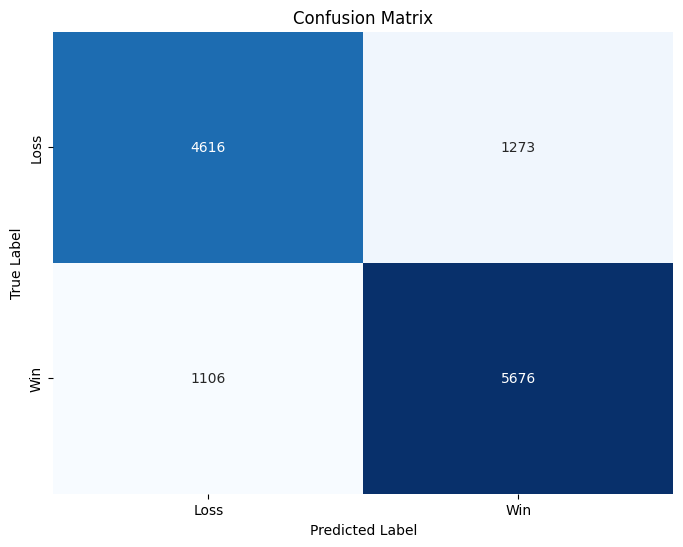

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


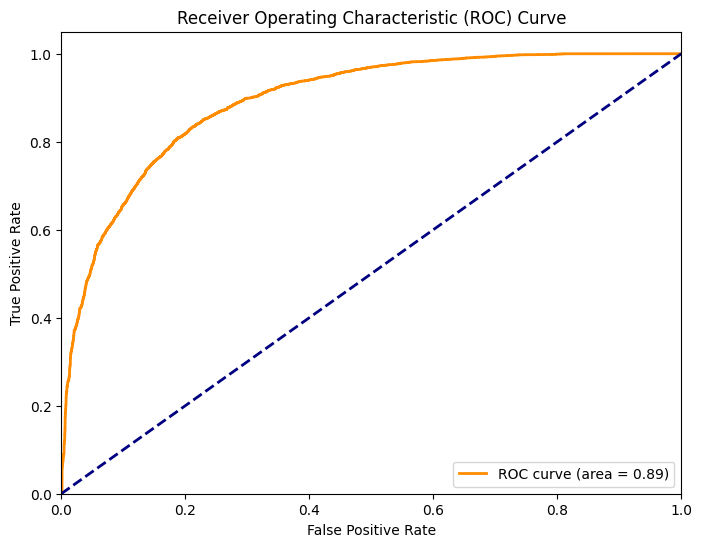

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [65]:
 # Assuming this is your ipython-input-64-c9ff5c5e12a0 cell.
# Restart kernel and run all cells.
import pandas as pd

def predict_win_probability(batting_team, bowling_team, city, runs_left, balls_left, wickets, total_runs_x, crr, rrr):
  input_data = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team], 'city': [city], 'runs_left': [runs_left], 'balls_left': [balls_left], 'wickets': [wickets], 'total_runs_x': [total_runs_x], 'crr': [crr], 'rrr': [rrr]})
  input_data_processed = pipe.named_steps['step1'].transform(input_data)
  win_probability = pipe.named_steps['step2'].predict_proba(input_data_processed)[0][1]
  return win_probability

batting_team = input("Enter batting team: ")
bowling_team = input("Enter bowling team: ")
city = input("Enter city: ")
runs_left = int(input("Enter runs left: "))
balls_left = int(input("Enter balls left: "))
wickets = int(input("Enter wickets left: "))
total_runs_x = int(input("Enter target score: "))
crr = float(input("Enter current run rate: "))
rrr = float(input("Enter required run rate: "))

win_probability = predict_win_probability(batting_team, bowling_team, city, runs_left, balls_left, wickets, total_runs_x, crr, rrr)

print(f"The predicted win probability for {batting_team} is: {win_probability:.2f}")

Enter batting team: Royal Challengers Bangalore
Enter bowling team: Chennai Super Kings
Enter city: Bangalore
Enter runs left: 60
Enter balls left: 36
Enter wickets left: 5
Enter target score: 180
Enter current run rate: 8.5
Enter required run rate: 10.0
The predicted win probability for Royal Challengers Bangalore is: 0.30
